In [1930]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1931]:
#load the dataset and check the head
train = pd.read_csv('titanic/train.csv')

In [1932]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Initial Data Exploration

In [1933]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1934]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


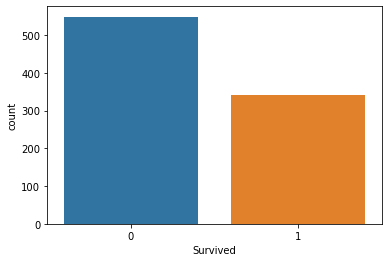

In [1935]:
sns.countplot(x='Survived', data=train)

In [1936]:
#explore relations between sex and survival
train.groupby('Sex')[['Survived']].count()

,Survived
Sex,
female,314
male,577


In [1937]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


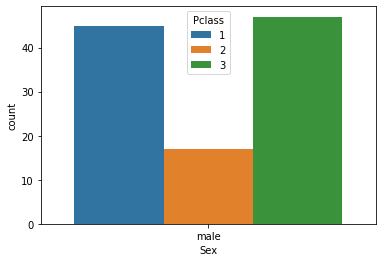

In [1938]:
sns.countplot(x='Sex', data=train[(train['Sex'] == 'male') & (train['Survived'] == 1)], hue='Pclass')

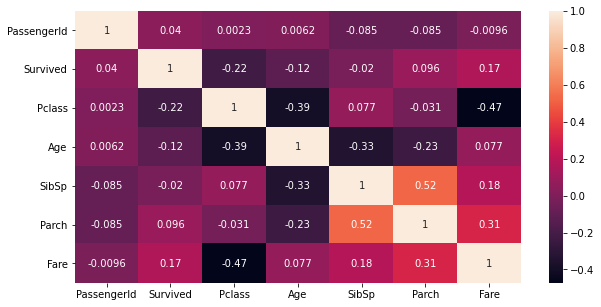

In [1939]:
#checking for differences in correlation between male/female survivors for potential interaction variables
plt.figure(figsize=(10,5))
sns.heatmap(train[(train['Sex'] == 'male')].corr(), cmap='rocket', annot=True)

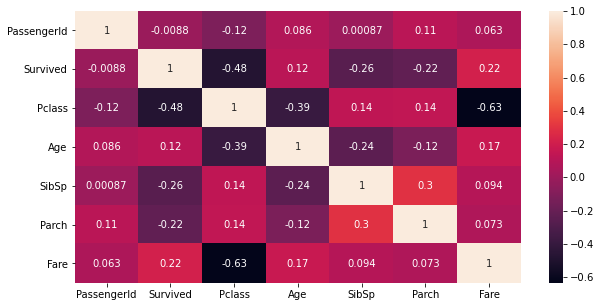

In [1940]:
plt.figure(figsize=(10,5))
sns.heatmap(train[(train['Sex'] == 'female')].corr(), cmap='rocket', annot=True)

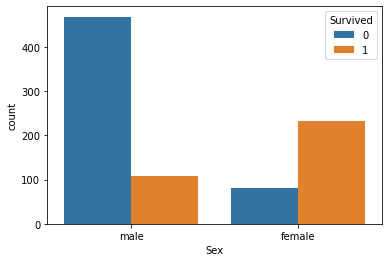

In [1941]:
sns.countplot(x='Sex', hue='Survived', data=train)

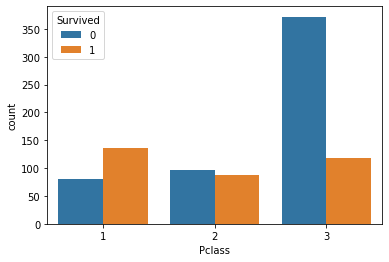

In [1942]:
#explore relations between PClass and survival
sns.countplot(x='Pclass', hue='Survived', data=train)

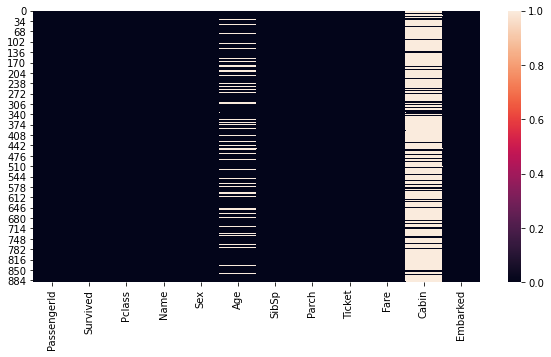

In [1943]:
#check for NA values visually
plt.figure(figsize=(10,5))
sns.heatmap(train.isna())

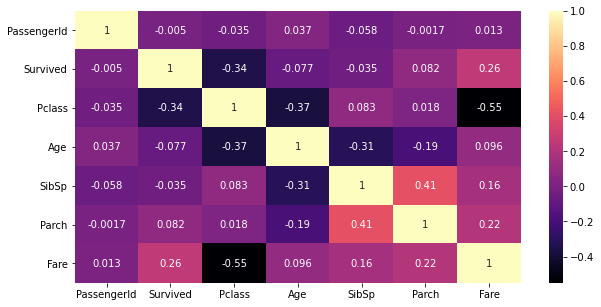

In [1944]:
#check correlation through heatmap
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), cmap='magma', annot=True)

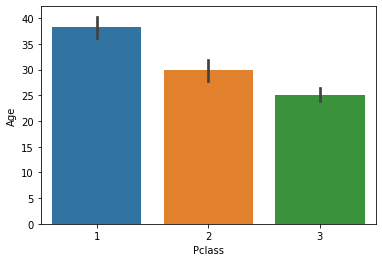

In [1945]:
#check age by class
sns.barplot(x='Pclass', y='Age', data=train)

In [1946]:
train.groupby('Pclass')[['Age']].mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [1947]:
#look for differences in survival based on sex + pclass
pd.pivot_table(train, index=['Sex', 'Pclass'], columns=['Survived'], values=['Age', 'Fare'])

Age                   Fare            
Survived               0          1           0           1
Sex    Pclass                                              
female 1       25.666667  34.939024  110.604167  105.978159
       2       36.000000  28.080882   18.250000   22.288989
       3       23.818182  19.329787   19.773093   12.464526
male   1       44.581967  36.248000   62.894910   74.637320
       2       33.369048  16.022000   19.488965   21.095100
       3       27.255814  22.274211   12.204469   15.579696

# Data Cleaning

In [1948]:
#remove columns that can't be used
train.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [1949]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [1950]:
#Get dummy variables for sex column
sex_dummies = pd.get_dummies(train['Sex'])

In [1951]:
#apply dummy variables to dataset
train = pd.concat([train, sex_dummies], axis=1)

In [1952]:
#redo process for embarked
embarked_dummies = pd.get_dummies(train['Embarked'])

In [1953]:
train = pd.concat([train, embarked_dummies], axis=1)

In [1954]:
#obtain and isolate the name prefix from each person
train['Title'] = train['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [1955]:
#examine all the different prefixes
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [1956]:
#combine prefixes of similar nature into one column
train['Title'] = train['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
train['Title'] = train['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

In [1957]:
#redo dummy process for prefixes
title_dummies = pd.get_dummies(train['Title'])

In [1958]:
train = pd.concat([train, title_dummies], axis=1)

In [1959]:
#drop columns that dummies were made for
train.drop(['Sex', 'Embarked', 'Name', 'Title'], axis=1, inplace=True)

In [1960]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Dr/Military/Noble/Clergy,Master,Miss/Mrs/Ms,Mr
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1,0,0,0,1


In [1961]:
train['Family Size'] = train['SibSp'] + train['Parch'] + 1

In [1962]:
#there was a decent negative correlation in SibSp and Parch for females, while
#males had a correlation around 0 for each, so we create an interaction term
#to help predict that difference
train['Gender * Family Size'] = train['male'] * train['Family Size']

In [1963]:
#from earlier, we found the average age for each PClass
#so we can fill the n/a ages based on class
def fill_age(columns):
    
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 26
    else:
        return age

In [1964]:
train['Age'] = train[['Age', 'Pclass']].apply(fill_age, axis=1)

In [1965]:
#same thought-process as earlier, create interaction term for Sex and Age
train['Gender * Age'] = train['male'] * train['Age']

In [1966]:
#check to make sure each category filled
train.isnull().sum()

PassengerId                 0
Survived                    0
Pclass                      0
Age                         0
SibSp                       0
Parch                       0
Fare                        0
female                      0
male                        0
C                           0
Q                           0
S                           0
Dr/Military/Noble/Clergy    0
Master                      0
Miss/Mrs/Ms                 0
Mr                          0
Family Size                 0
Gender * Family Size        0
Gender * Age                0
dtype: int64

# Model Fitting

In [1967]:
## split the data
from sklearn.model_selection import train_test_split

In [1968]:
x = train.drop(['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [1969]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [1970]:
from sklearn.preprocessing import MinMaxScaler

In [1971]:
#scale the data to help the DNN
scaler = MinMaxScaler()

In [1972]:
scaler.fit(x_train)

MinMaxScaler()

In [1973]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [1974]:
import tensorflow as tf
from tensorflow import keras

In [1975]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [1976]:
model = Sequential()

In [1977]:
x_train.shape

(623, 17)

In [1978]:
#add layers to the model. Create dropout layers in between to prevent overfitting
model.add(Dense(17, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1, activation='sigmoid'))

In [1979]:
#create an early stop to further prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [1980]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics='binary_accuracy')

In [1981]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=500, batch_size=64, callbacks=[early_stop])

Epoch 1/500
10/10 [==============================] - 2s 45ms/step - loss: 0.6846 - binary_accuracy: 0.5423 - val_loss: 0.6504 - val_binary_accuracy: 0.6791
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6446 - binary_accuracy: 0.6551 - val_loss: 0.6155 - val_binary_accuracy: 0.7649
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6222 - binary_accuracy: 0.6604 - val_loss: 0.5823 - val_binary_accuracy: 0.7761
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5934 - binary_accuracy: 0.6848 - val_loss: 0.5574 - val_binary_accuracy: 0.7724
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5597 - binary_accuracy: 0.7401 - val_loss: 0.5353 - val_binary_accuracy: 0.7575
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.5495 - binary_accuracy: 0.7331 - val_loss: 0.5181 - val_binary_accuracy: 0.7612
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - lo

10/10 [==============================] - 0s 5ms/step - loss: 0.4618 - binary_accuracy: 0.8272 - val_loss: 0.4224 - val_binary_accuracy: 0.8321
Epoch 54/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4507 - binary_accuracy: 0.8219 - val_loss: 0.4208 - val_binary_accuracy: 0.8358
Epoch 55/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4140 - binary_accuracy: 0.8346 - val_loss: 0.4209 - val_binary_accuracy: 0.8358
Epoch 56/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4296 - binary_accuracy: 0.8117 - val_loss: 0.4219 - val_binary_accuracy: 0.8284
Epoch 57/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4505 - binary_accuracy: 0.8125 - val_loss: 0.4219 - val_binary_accuracy: 0.8358
Epoch 58/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3938 - binary_accuracy: 0.8487 - val_loss: 0.4233 - val_binary_accuracy: 0.8358
Epoch 59/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4

10/10 [==============================] - 0s 4ms/step - loss: 0.3949 - binary_accuracy: 0.8465 - val_loss: 0.4070 - val_binary_accuracy: 0.8396
Epoch 106/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4270 - binary_accuracy: 0.8314 - val_loss: 0.4093 - val_binary_accuracy: 0.8321
Epoch 107/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4352 - binary_accuracy: 0.8260 - val_loss: 0.4125 - val_binary_accuracy: 0.8358
Epoch 108/500
10/10 [==============================] - 0s 4ms/step - loss: 0.3964 - binary_accuracy: 0.8518 - val_loss: 0.4136 - val_binary_accuracy: 0.8321
Epoch 109/500
10/10 [==============================] - 0s 4ms/step - loss: 0.4326 - binary_accuracy: 0.8363 - val_loss: 0.4140 - val_binary_accuracy: 0.8284
Epoch 110/500
10/10 [==============================] - 0s 5ms/step - loss: 0.4037 - binary_accuracy: 0.8370 - val_loss: 0.4134 - val_binary_accuracy: 0.8246
Epoch 111/500
10/10 [==============================] - 0s 6ms/step - los

In [1982]:
losses = pd.DataFrame(model.history.history)

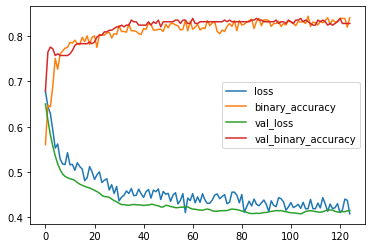

In [1983]:
#plot losses to check for overfitting/accuracy
losses.plot()

In [1984]:
preds = model.predict_classes(x_test)

/Users/colesilva/opt/anaconda3/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [1985]:
from sklearn.metrics import classification_report

In [1986]:
#check total accuracy and f1-scores of the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       163
           1       0.80      0.75      0.77       105

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

